In [1]:
# Import necessary libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('Crop_recommendation.csv')

In [3]:
# Data Cleaning
# Check for null values
print(data.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


We checked there are no null values in our dataset, so we don't need to impute or drop any columns.

In [4]:
# Rename Columns
data = data.rename(columns={'N': 'Nitrogen', 'P': 'Phosphorus', 'K': 'Potassium', 
                            'temperature': 'Temperature', 'humidity': 'Humidity', 'ph': 'pH', 
                            'rainfall': 'Rainfall', 'label': 'Crop'})


In [5]:
# Capitalizing the first letter of column name
data.columns = data.columns.str.capitalize()

In [6]:
# checking the top 5 rows
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,Ph,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
# checking bottom rows
data.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,Ph,Rainfall,Crop
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [8]:
# checking the data types
data.dtypes

Nitrogen         int64
Phosphorus       int64
Potassium        int64
Temperature    float64
Humidity       float64
Ph             float64
Rainfall       float64
Crop            object
dtype: object

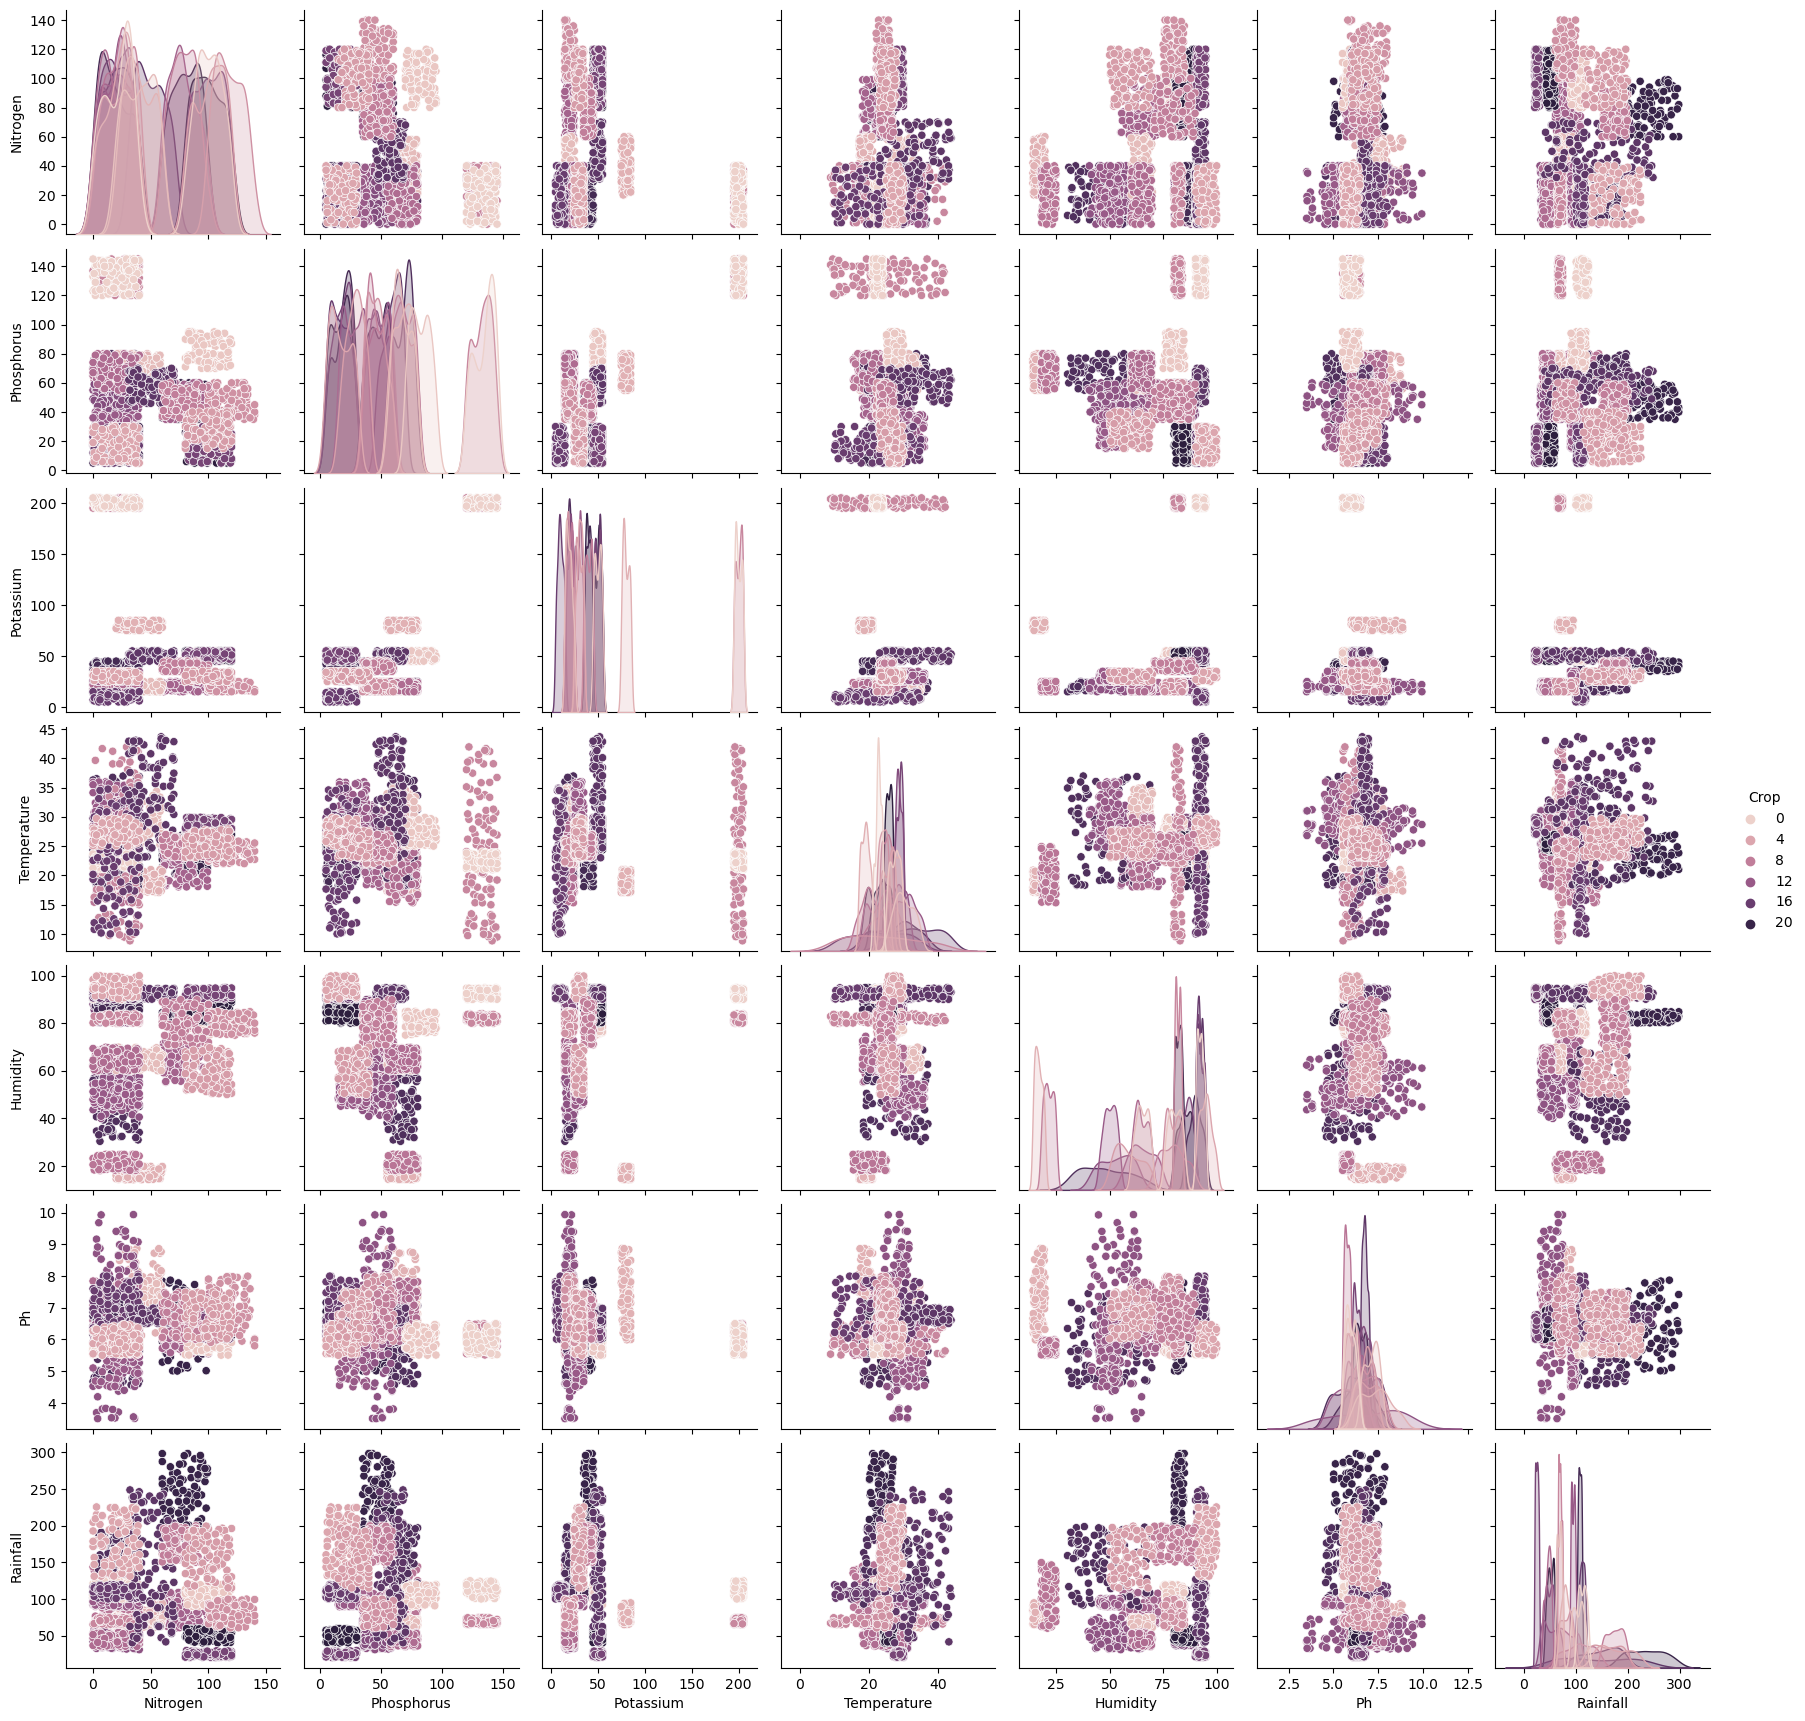

In [22]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='Crop')
plt.show()

In [27]:
data.corr()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,Ph,Rainfall,Crop
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.031130
Phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.491006
Potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.346417
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.113606
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.193911
Ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.012253
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.045611
Crop,-0.031130,-0.491006,-0.346417,0.113606,0.193911,-0.012253,0.045611,1.000000


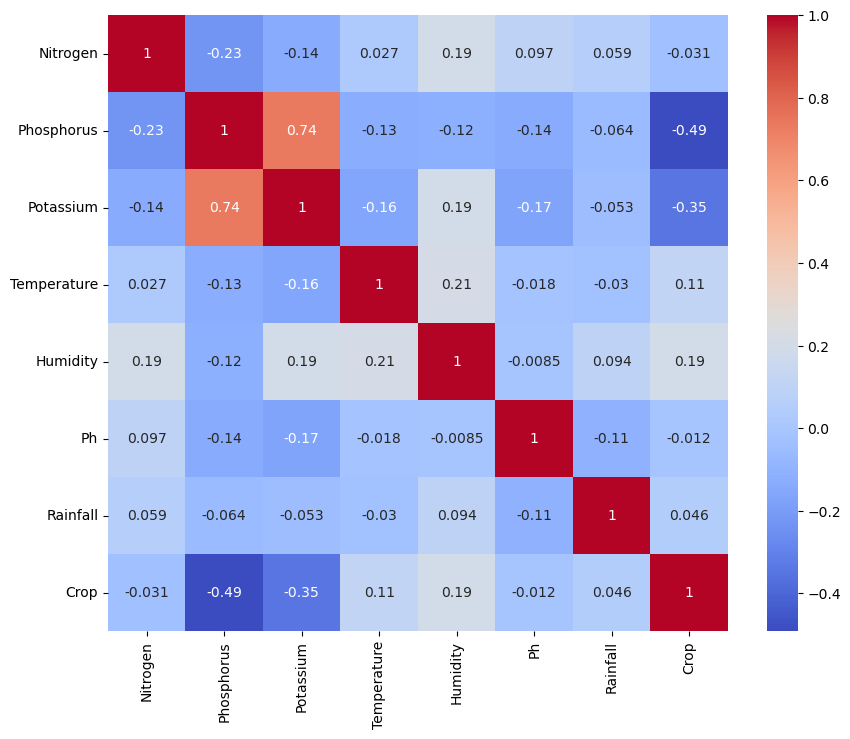

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
# Encode the labels as integers
label_encoder = LabelEncoder()
data['Crop'] = label_encoder.fit_transform(data['Crop'])

In [10]:
# Split dataset into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [11]:
# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Create the DMatrix object
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)


In [14]:
# Define the hyperparameters
params = {
    'objective': 'multi:softmax', # Specify the objective function
    'num_class': len(set(y_train)), # Specify the number of classes
    'eta': 0.1, # Learning rate
    'max_depth': 3, # Maximum depth of the tree
    'verbosity': 0, # Set the level of information printed during training
    'subsample': 0.7, # Subsample ratio of the training instances
    'colsample_bytree': 0.7 # Subsample ratio of columns when constructing each tree
}

In [15]:
# Train the model
num_rounds = 50
model = xgb.train(params, dtrain, num_rounds)

In [16]:
# Predict the test results
y_pred = model.predict(dtest)

In [17]:
# Calculate the accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [18]:
#checking the accuracy of the model
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9954545454545455
Confusion Matrix:
 [[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0

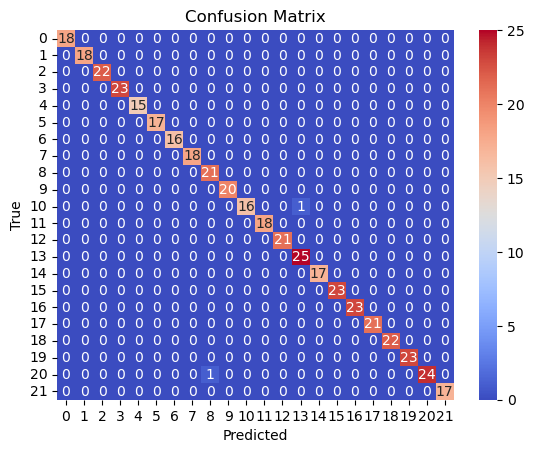

In [23]:
#Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

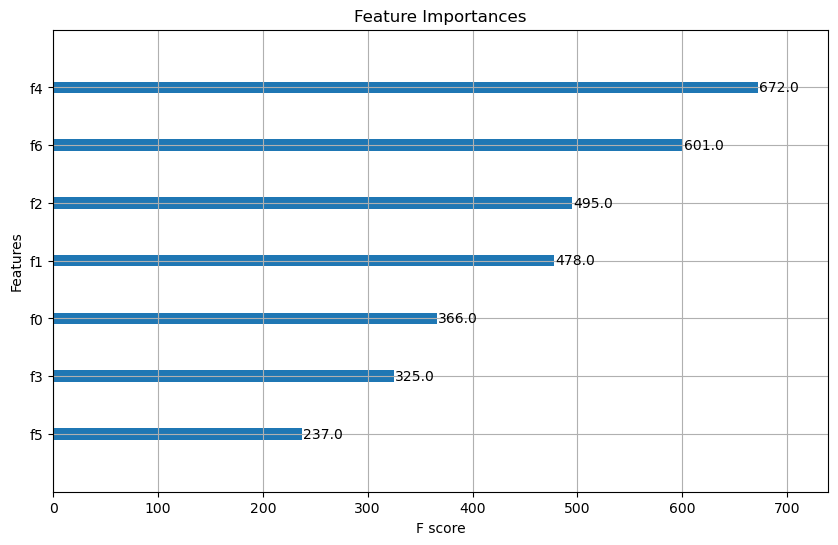

In [20]:
#Plot the feature importances
fig, ax = plt.subplots(figsize=(10,6))
xgb.plot_importance(model, ax=ax)
plt.title('Feature Importances')
plt.show()